# Electron drift in conductors
In this notebook we will use Python to explore some of the ideas involved in the Drude model. In particular we will look at how we can represent an ensemble (a group) of electrons scattering in random directions as they move down a conductor.

As usual, don't worry too much about the Python itself. Focus on the physics that is being represented.

### First we load some important modules and set up a few things

In [186]:
from __future__ import division
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

### The Drude model and electron drift
You will recall from the lecture notes that in deriving the Drude model result for the electronic conductivity we assume that we can model the moving gas of electrons via a single average velocity. This average velocity is set to zero at each electron collision (these collisions occur every $\tau$) and increases linearly according to the action of the electric field in between collisions.

In reality, of course, there are many electrons in the conductor moving in all directions. In addition to this, collision of the electrons will scatter them in new directions, but will not tend to casue the velocity of individual electrons to become zero.

Here we will consider a somewhat more realistic model of electron drift (though still one with many apporximations) and show that *on average* the electrons move as asumed in the Drude model. 

In this new model we consider hte motion of a group of electrons and our assumptions are as follows:

- We work in a two dimensional approximation;
- At time zero, all the electrons begin at point (0,0);
- The electrons initially move with speed $v$ in a random direction;
- after a time $\tau$ each electron undergoes a scattering event;
- Scattering results in the direction of each electron being randomised once again and its speed being set to $v$;
- Between scattering events the electrons move as free charged particles under the influence of an external field E acting in the negative x-direction.

We will use arbitrary units and set the electron charge to $q=-1.0$, the electron mass to $m_{\mathrm{e}}=1.0$, the electric field to $E=(-1.0,0.0)$, the interval between collision to $\tau=1.0$ and the electron speed to $v=1.0$.



### Setting up an initial velocity distribution
We will work with an ensemble of 20 electrons. The code below sets up an initial velocity distribution.

In [187]:
# Set parameters of simulation
E = np.array([-1.0,0.0]) # Electric field
me = 1.0 # Electron mass
e = -1.0 # Electron charge
tau = 1.0 # Collision interval

n = 20 # Number of electrons to consider

r = np.zeros((n,2), dtype=float) # Initialise positions to zero
v = np.zeros((n,2), dtype=float) # Set up velocity array
# Now set up a random set of initial directions
d = 2.0*np.pi*np.random.rand(n) # Select a random angle from 0 to 2 pi
v[:,0] = np.sin(d) # Set the x component of the velocity
v[:,1] = np.cos(d) # Set the y component of the velocity

Let's take a look at this velocity using a plot. Note that the last three lines of the code below are essentially a hack to set the scale of the plot. This is not very easy to do with `quiver()` - it tends to autoscale to show only the region occupied by the arrows. The blue dots will also help mark the original position of the electrons.

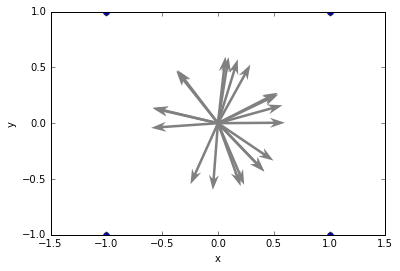

In [188]:
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
quiver(r[:,0], r[:,1], v[:,0], v[:,1], headwidth=4, headlength=6, color='gray', scale=5.0, scale_units='width')
b = 1.0
corners = np.array([[-b,-b],[b,-b],[b,b],[-b,b]])
plt.plot(corners[:,0],corners[:,1], 'o')

### Time evolution of the electrons
Next we need to implement the time evolution of the electrons. This is quite simple. All we need to do is apply the Newtonian equation of motion for a free particle under a constant acceleration $a$:
$$
\mathbf{r} \to \mathbf{r} + \frac{1}{2}\mathbf{a} (\Delta t)^2.
$$
In this case, the acceleration is just due to the electric field
$$
\mathbf{a} = \frac{\mathbf{E}e}{m_{\mathrm{e}}},
$$
and the change in time is just the time between collisions $\tau$. We will implement the time evolution in a function and also set up a function to reset all the electron positions to zero.

In [189]:
def evolve_system():
    # Evolve position according to newtonian dynamics at current velocity
    r[:,:] = r[:,:] + v[:,:]*tau + 0.5*(E*e/me)*tau**2
    #v[:,:] = v[:,:] + (E*e/me)*tau
    # Randomise direction of motion due to scattering
    d = np.random.rand(n)
    d = d*2.0*np.pi
    v[:,0] = np.sin(d) 
    v[:,1] = np.cos(d)
    
def reset_positions():
    r[:,:] = 0.0

### A single collision event
First we will apply our evolution function a single time to simulate a single period of free flight followed by a single randomisation of the electron directions by scattering.

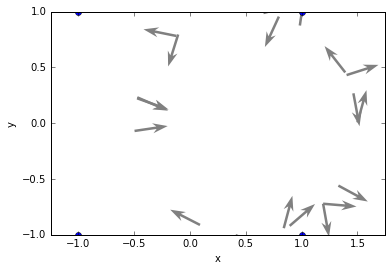

In [190]:
evolve_system()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
quiver(r[:,0], r[:,1], v[:,0], v[:,1], headwidth=4, headlength=6, color='gray', scale=10.0, scale_units='width')
plot(corners[:,0],corners[:,1], 'o')

The electrons have certainly moved. If you look closely, you should also see that the average position of the electrons has also shifted from the centre in the direction of the force due to the electric field (i.e. in the $+x$ direction).

### A few more steps
Now let's reset the postions and evolve for a longer time:

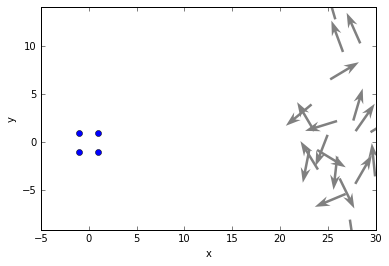

In [191]:
reset_positions()
for t in range(50):
    evolve_system()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
quiver(r[:,0], r[:,1], v[:,0], v[:,1], headwidth=4, headlength=6, color='gray', scale=10.0, scale_units='width')
plot(corners[:,0],corners[:,1], 'o')

Now it should be clear what is going on: the average position of the electrons is moving (drifting) in the direction dictated by the field.

### Recording the mean position
Rather than just trying to discern the mean position of the electrons by eye, let's get python to calculate it and record the trajectory of the mean position of the ensemble of electrons. While we're at it, let's record the standard deviation of the position too. 

For starters, we'll test the output for 10 steps.

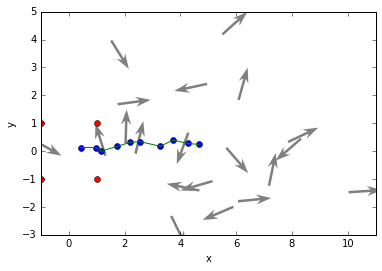

In [192]:
reset_positions()
nsteps = 10
rmean = np.zeros((nsteps,2), dtype=float)
rstd = np.zeros((nsteps,2), dtype=float)
for t in range(nsteps):
    evolve_system()
    rmean[t,0] = np.mean(r[:,0])
    rmean[t,1] = np.mean(r[:,1])
    rstd[t,0] = np.std(r[:,0])
    rstd[t,1] = np.std(r[:,1])

ts = np.linspace(0,nsteps,nsteps)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
quiver(r[:,0], r[:,1], v[:,0], v[:,1], headwidth=4, headlength=6, color='gray', scale=10.0, scale_units='width')
plt.plot(rmean[:,0],rmean[:,1], 'o')
plt.plot(rmean[:,0],rmean[:,1], '-')
plot(corners[:,0],corners[:,1], 'o')

I've plotted a series of points to indicate the evolution of the mean position. This looks like the drift we expect.

### A longer simulation
It looks like we are getting the expected behaviour. Let's run a longer simulation to test this:

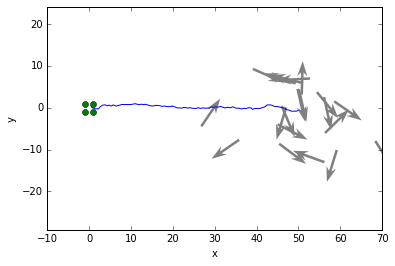

In [193]:
reset_positions()
nsteps = 100
rmean = np.zeros((nsteps,2), dtype=float)
rstd = np.zeros((nsteps,2), dtype=float)
for t in range(nsteps):
    evolve_system()
    rmean[t,0] = np.mean(r[:,0])
    rmean[t,1] = np.mean(r[:,1])
    rstd[t,0] = np.std(r[:,0])
    rstd[t,1] = np.std(r[:,1])

ts = np.linspace(0,nsteps,nsteps)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
quiver(r[:,0], r[:,1], v[:,0], v[:,1], headwidth=4, headlength=6, color='gray', scale=10.0, scale_units='width')
plt.plot(rmean[:,0],rmean[:,1], '-')
plot(corners[:,0],corners[:,1], 'o')

It looks right. We can also plot the mean position in the x direction against time.

<Container object of 3 artists>

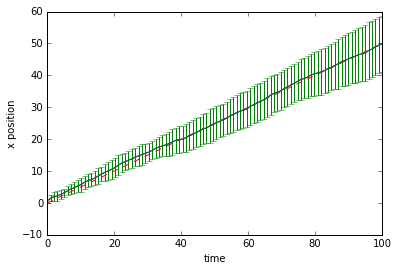

In [194]:

plt.plot(ts,0.5*ts, 'r--')
plt.xlabel('time')
plt.ylabel('x position')
plt.plot(ts,rmean[:,0], 'b-')
plt.errorbar(ts,rmean[:,0], color='g', yerr=rstd[:,0])

In the above plot, the blue line shows the mean position, the green error bars indicate the standard deviation in the position over the ensemble and the red line is a straight line with a gradient of 0.5. This gradient is the *drift velocity* of the electrons.

### A question
Finally, let's run the simulation for a large number of steps and plot the the evolution of the standard deviation of the electron position about the mean.

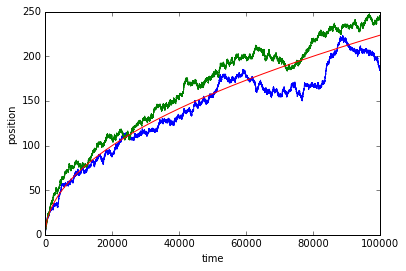

In [195]:
reset_positions()
nsteps = 100000
rmean = np.zeros((nsteps,2), dtype=float)
rstd = np.zeros((nsteps,2), dtype=float)
for t in range(nsteps):
    evolve_system()
    rmean[t,0] = np.mean(r[:,0])
    rmean[t,1] = np.mean(r[:,1])
    rstd[t,0] = np.std(r[:,0])
    rstd[t,1] = np.std(r[:,1])

ts = np.linspace(0,nsteps,nsteps)

plt.xlabel('time')
plt.ylabel('position')
plt.plot(ts,rstd[:,0])
plt.plot(ts,rstd[:,1])
plt.plot(ts,sqrt(ts)/sqrt(2))

I'm showing both the x and y components in blue and green respectively. The red line is a plot of $\sqrt{(t/2)}$ and seems to be a good fit to the data. Why is this?